In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import os #files
import glob #files

In [2]:
file_Path = '/kaggle/input/cosmology-simulation-data-from-illustris-tng-50'

subhalo_Files = glob.glob(os.path.join(file_Path,"*.hdf5"))

dfList = []
for f in subhalo_Files:
    #print(f)
    path_h5 = f
    df_DM = pd.DataFrame(np.array(h5py.File(path_h5)['PartType1']['Coordinates']), columns=['x', 'y', 'z'])
    df_stars = pd.DataFrame(np.array(h5py.File(path_h5)['PartType4']['Coordinates']), columns=['x', 'y', 'z'])
    df_DM['particleType'] = ['d']*len(df_DM)
    df_stars['particleType'] = ['s']*len(df_stars)
    df_temp = pd.concat([df_stars, df_DM], axis=0, ignore_index=True)
    dfList.append(df_temp)

data = pd.concat(dfList, axis=0, ignore_index=True)
data = data.sample(frac=1)

print("Number of particles:", len(data))

data.head()

Number of particles: 3047704


,x,y,z,particleType
749605,9560.041016,13075.958008,4168.526855,s
618131,9477.329102,13067.417969,4242.146973,s
2231237,9538.367188,13116.645508,4310.279785,d
754511,9468.757812,13069.043945,4247.948730,d
135937,9469.533203,13072.134766,4247.377441,s


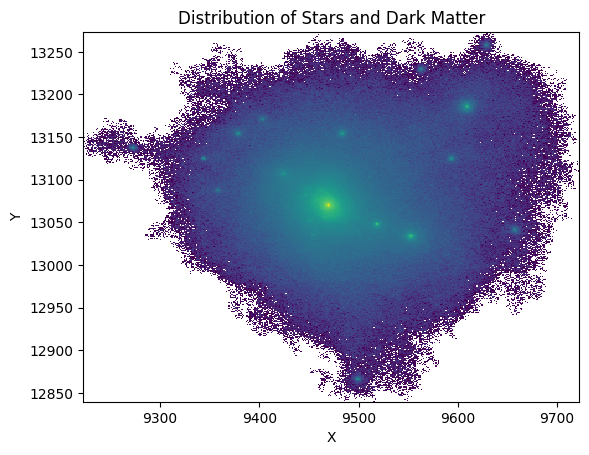

In [3]:
plt.hist2d(data.x, data.y, bins=400, norm=mpl.colors.LogNorm())
plt.title("Distribution of Stars and Dark Matter")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Now let's create two plots like the one above, one for visualizing the distribution of stars, and one for visualizing the distribution of dark matter.

Are the different types of matter distributed differently?

Why might this be?